<a href="https://colab.research.google.com/github/Seeun1124/myrepo/blob/main/240320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics 카테고리 개요
1. Prob Distribution (확률 분포)
- 이산확률분포에는 베르누이, 이항, 다항 분포가 있음.
- 연속확률분포에는 균등, 정규, 베타, 감마, 스튜던트 t, 카이제곱, F, 디리클레, 다변량정규 분포로 나뉨.
2. Descriptive Statistics (기술 통계)

3. Normality test (정규성 검정)
4. Equal Var. test (등분산 검정)
5. Correlation Analysis (상관분석)
6. Reliablitity Analysis (신뢰도 분석)
7. Chi-square test (카이-제곱 검정)
8. Student's t-test (스튜던트화 t-검정)
9. ANOVA
10. Factor Analysis (요인 분석)
11. Regression (회귀분석)
12. Logistic Regression (로지스틱 회귀분석)

# Import

In [77]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Data

In [46]:
# Visual Python: Data Analysis > File
train = pd.read_csv('./train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [59]:
# Visual Python: Data Analysis > File
test = pd.read_csv('./test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [86]:
# Visual Python: Data Analysis > Groupby
train.groupby(['Sex']).sum('Survived')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,135343,233,678,7286.00,218,204,13966.6628
male,262043,109,1379,13919.17,248,136,14727.2865


# 기술 통계

### Descriptive statistics

,Age,Survived
N Total,891.000,891.000
N Valid,714.000,891.000
N Missing,177.000,0.000
Mean,29.699,0.384
Sum,21205.170,342.000
Std. deviation,14.526,0.487
Variance,211.019,0.237
Percentile: 25,20.125,0.000
Percentile: 50,28.000,0.000
Percentile: 75,38.000,1.000


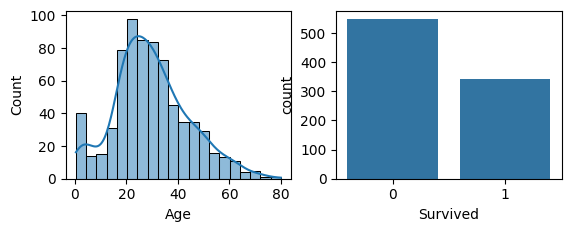

In [110]:
# Visual Python: Descriptive Statistics
vp_df = train[['Age', 'Survived']].copy()

# Descriptive statistics
from IPython.display import display, Markdown
display(Markdown('### Descriptive statistics'))
display(pd.DataFrame({
    'N Total':vp_df.shape[0],
    'N Valid':vp_df.count(numeric_only=True),
    'N Missing':vp_df.loc[:,vp_df.apply(pd.api.types.is_numeric_dtype)].isnull().sum(),
    'Mean':vp_df.mean(numeric_only=True),
    'Sum':vp_df.sum(numeric_only=True),
    'Std. deviation':vp_df.std(numeric_only=True),
    'Variance':vp_df.var(numeric_only=True),
    'Percentile: 25':vp_df.quantile(q=0.25, numeric_only=True),
    'Percentile: 50':vp_df.quantile(q=0.50, numeric_only=True),
    'Percentile: 75':vp_df.quantile(q=0.75, numeric_only=True),
}).round(3).T)

# Charts
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    # Histogram
    idx = 1
    for col in vp_df.columns:
        plt.subplot(2,2, idx)
        if pd.api.types.is_numeric_dtype(vp_df[col]) and  vp_df[col].value_counts().size > 10:
            sns.histplot(data=vp_df, x=col, kde=True)
        else:
            sns.countplot(data=vp_df, x=col)

        if idx < 4:
            idx += 1
        else:
            idx = 1
            plt.tight_layout()
            plt.show()

# 정규성 검정

## Q-Q plot

- 연속 변수인 Age가 정규 분포를 따르는지 여부를 확인하기 위해 정규성 검정인 Shapiro-Wilk test를 수행

### Normality test (Shapiro-Wilk)

,Statistic,p-value
Normality test (Shapiro-Wilk),0.964178,0.000125


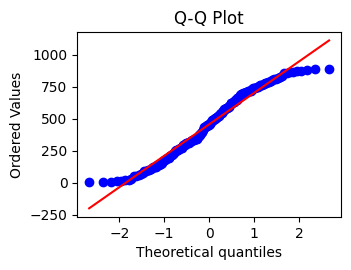

In [129]:
# Visual Python: Normality test
# Shapiro-Wilk test
vp_df = train.loc[(train['Age'].notnull()), ].dropna().copy()

# Normality test (Shapiro-Wilk)
from IPython.display import display, Markdown
from scipy import stats
_res = stats.shapiro(vp_df['PassengerId'])
display(Markdown('### Normality test (Shapiro-Wilk)'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},index=['Normality test (Shapiro-Wilk)']))

# Charts
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)

    plt.subplot(2,2,1)
    stats.probplot(vp_df['PassengerId'], plot=plt)
    plt.title('Q-Q Plot')

    plt.tight_layout()
    plt.show()

-  검정 결과, p-value가 유의수준 0.05보다 작기 때문에 train 데이터는 정규 분포를 따른다는 귀무 가설을 채택한다.

# 등분산 검정

,Variance
0,247.731356
1,221.715461


### Bartlett test

,Statistic,p-value
Equal Variance test (Bartlett),0.246227,0.619744


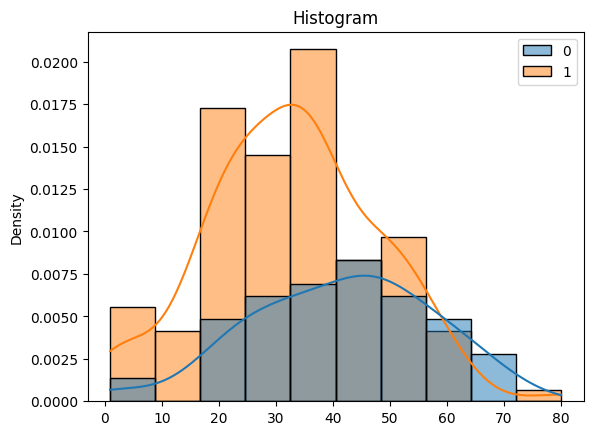

In [147]:
# Visual Python: Equal Var. test
# Bartlett test
vp_df = train.dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Survived')['Age'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Bartlett test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.bartlett(*_lst)
display(Markdown('### Bartlett test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Bartlett)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

,Variance
0,247.731356
1,221.715461


### Levene test

,Statistic,p-value
Equal Variance test (Levene),0.601005,0.439206


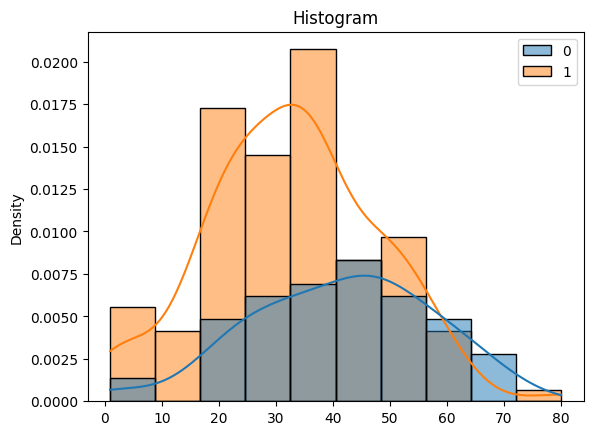

In [157]:
# Visual Python: Equal Var. test
# Levene test
vp_df = train.dropna().copy()
_df = pd.DataFrame()
for k, v in  dict(list(vp_df.groupby('Survived')['Age'])).items():
    _df_t = v.reset_index(drop=True)
    _df_t.name = k
    _df = pd.concat([_df, _df_t], axis=1)

# Variance
from IPython.display import display, Markdown
from scipy import stats
_dfr = _df.var().to_frame()
_dfr.columns = ['Variance']
display(_dfr)

# Levene test
_lst = []
_df.apply(lambda x: _lst.append(x.dropna()))
_res = stats.levene(*_lst, center='mean')
display(Markdown('### Levene test'))
display(pd.DataFrame(data={'Statistic':_res.statistic,'p-value':_res.pvalue},
                     index=['Equal Variance test (Levene)']))

# Histogram
import seaborn as sns
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=Warning)
    sns.histplot(_df, stat='density', kde=True)
    plt.title('Histogram')
    plt.show()

# 상관분석